# Random Forest Modelling on Breast Cancer Dataset

### Importing libraries

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

#### Loading and understanding data

In [2]:
data = load_breast_cancer()

In [9]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

#### Data preparation for modelling 

In [4]:
X = data.data
y= data.target

In [8]:
X.shape, y.shape

((569, 30), (569,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [13]:
X_train.shape, y_train.shape

((455, 30), (455,))

In [14]:
X_test.shape, y_test.shape

((114, 30), (114,))

#### Model building

In [15]:
rf_clf = RandomForestClassifier(n_estimators=70)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=70)

In [16]:
def accuracy(model, X_train, X_test, y_train, y_test, return_scores = 0):
    training_score = round((model.score(X_train, y_train))*100,4)
    test_score = round((model.score(X_test, y_test))*100,4)
    print(f"Training Score: {training_score}%")
    print(f"Test Score: {test_score}%")
    
    if return_scores:
        return training_score, test_score

In [18]:
accuracy(rf_clf, X_train, X_test, y_train, y_test, return_scores = 0)

Training Score: 100.0%
Test Score: 97.3684%


In [23]:
for estimators in [30, 40, 50, 80, 85, 90, 95, 100, 120, 500]:
    rf_clf = RandomForestClassifier(n_estimators=estimators)
    rf_clf.fit(X_train, y_train)
    print(f"Random Forest with {estimators} estimators:")
    accuracy(rf_clf, X_train, X_test, y_train, y_test, return_scores = 0)
    print("\n")

Random Forest with 30 estimators:
Training Score: 100.0%
Test Score: 97.3684%


Random Forest with 40 estimators:
Training Score: 100.0%
Test Score: 96.4912%


Random Forest with 50 estimators:
Training Score: 99.7802%
Test Score: 96.4912%


Random Forest with 80 estimators:
Training Score: 100.0%
Test Score: 97.3684%


Random Forest with 85 estimators:
Training Score: 100.0%
Test Score: 97.3684%


Random Forest with 90 estimators:
Training Score: 100.0%
Test Score: 97.3684%


Random Forest with 95 estimators:
Training Score: 100.0%
Test Score: 98.2456%


Random Forest with 100 estimators:
Training Score: 100.0%
Test Score: 96.4912%


Random Forest with 120 estimators:
Training Score: 100.0%
Test Score: 96.4912%


Random Forest with 500 estimators:
Training Score: 100.0%
Test Score: 97.3684%




#### Getting best accuracy with 95 estimators

In [28]:
rf_clf = RandomForestClassifier(n_estimators=95)
rf_clf.fit(X_train, y_train)
accuracy(rf_clf, X_train, X_test, y_train, y_test, return_scores = 0)

Training Score: 100.0%
Test Score: 98.2456%


In [29]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

In [30]:
print(f'Training Accuracy: {round((accuracy_score(y_train, y_pred_train)*100),2)}%')
print(f'Test Accuracy: {round((accuracy_score(y_test, y_pred_test)*100),2)}%')

Training Accuracy: 100.0%
Test Accuracy: 98.25%


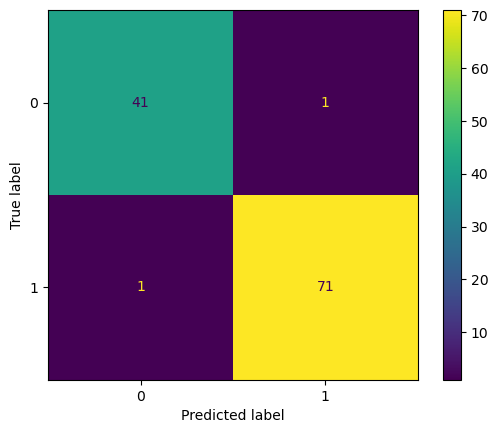

In [33]:
# Visualizing confusion matrix in a better way

cm = confusion_matrix(y_test, y_pred_test, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot();

In [34]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [35]:
f1_score(y_test, y_pred_test)

0.9861111111111112